# Sales Analysis

### Import necessary libraries

In [1]:
import os
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Merge data from each month into one dataframe

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [3]:
all_data = all_months_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Validation and Numeric Exploration

In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

 **I have to convert data types for price, Quantity to numeric values and Order date to date or datetime. It will be done later on in this report** 

In [6]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<Axes: >

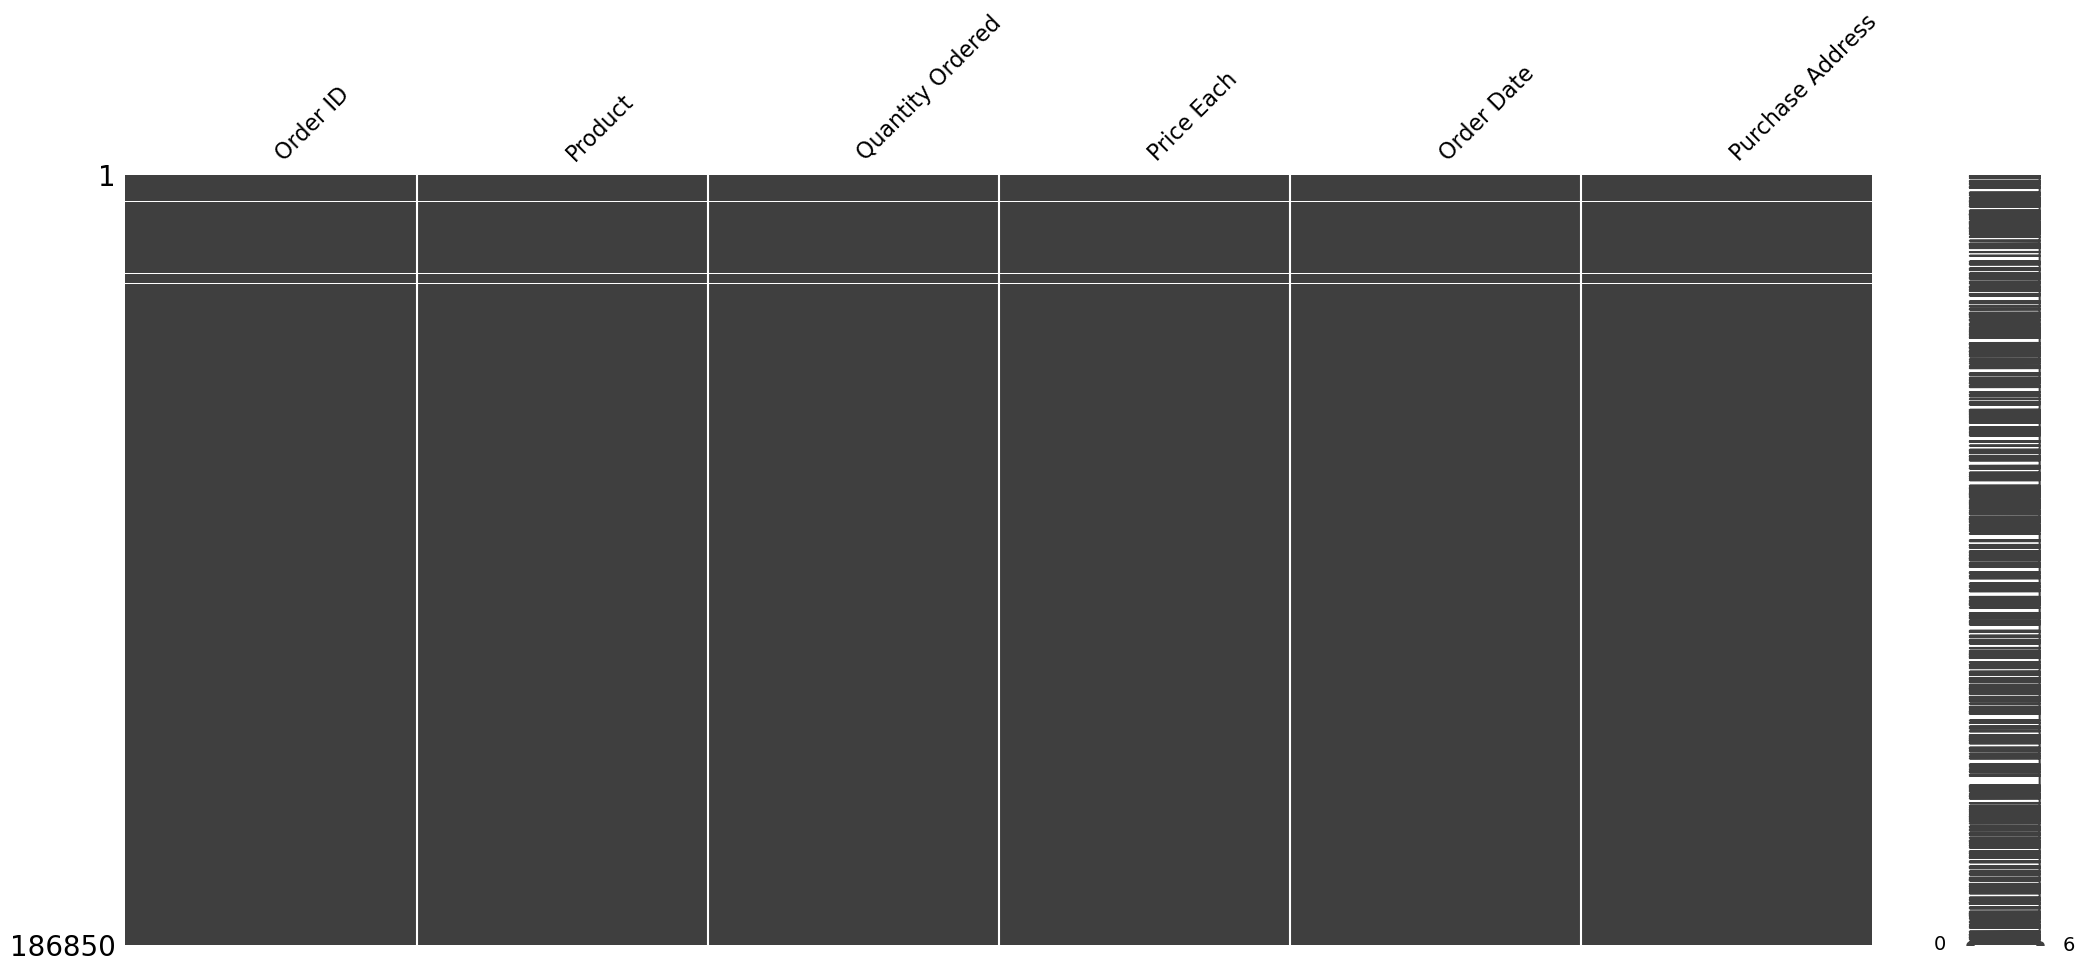

In [7]:
msno.matrix(all_data)

**The nan values appear correlated an in the same index for all the columns. Also they are very few compared to the lenght of the data**

In [8]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Drop rows of NAN

In [9]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Get rid of text in order date column

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [12]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [14]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [15]:
month_group=all_data.groupby(['Month']).sum()
month_group

C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\1606063638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_group=all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

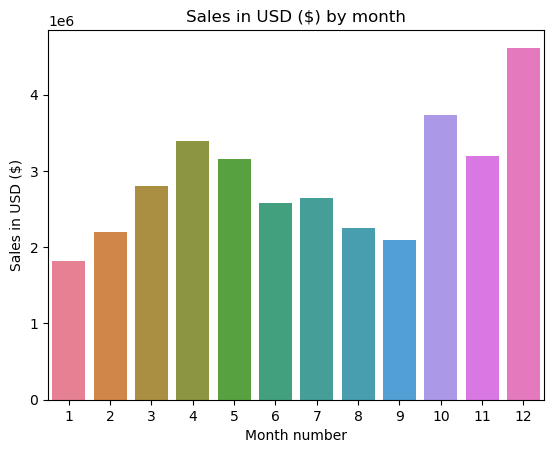

In [17]:
g=sns.barplot(data=month_group,x=month_group.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by month")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [18]:
group_city = all_data.groupby(['City']).sum()
group_city

C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\2586806028.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_city = all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


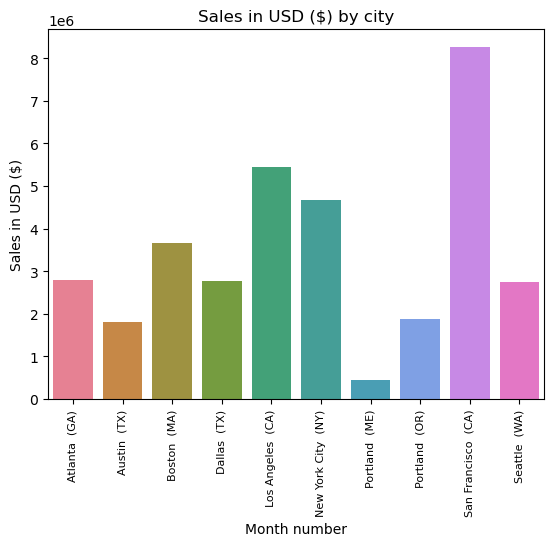

In [19]:
g=sns.barplot(data=group_city,x=group_city.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by city")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\784508144.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


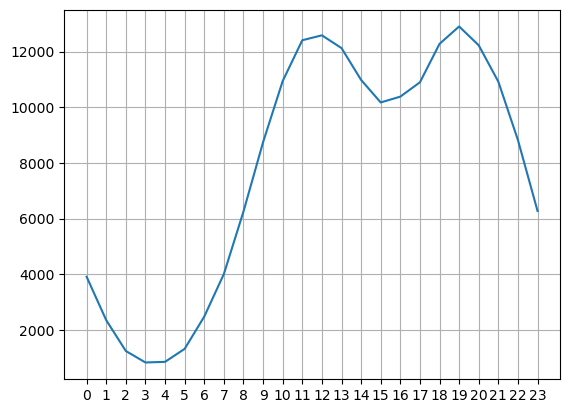

In [21]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4) What product sold the most? Why do you think it sold the most?

C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\1116667011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()[['Quantity Ordered']]


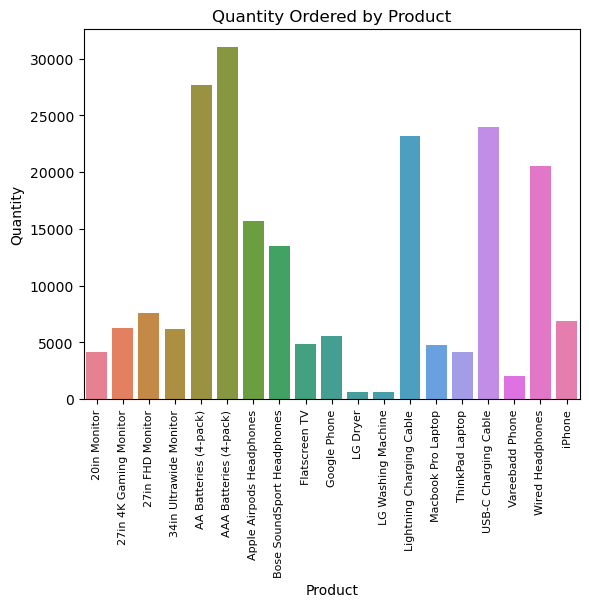

In [22]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()[['Quantity Ordered']]

g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl')
g.set_title("Quantity Ordered by Product")
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation='vertical', size=8)
plt.show()

C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\3508498295.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()[['Price Each']]
C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\3508498295.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  h=sns.lineplot(data=prices,x=prices.index,y='Price Each',palette='husl',ax=ax2,color='gray')


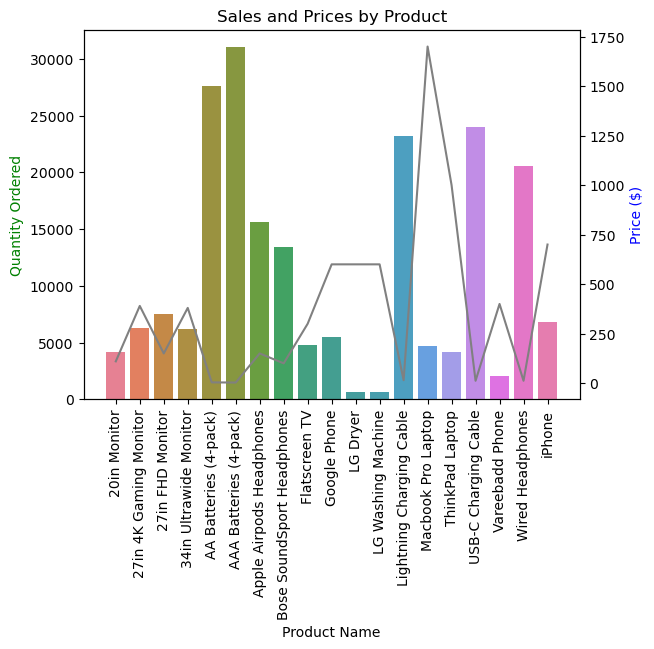

In [23]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()[['Price Each']]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl',ax=ax1)
h=sns.lineplot(data=prices,x=prices.index,y='Price Each',palette='husl',ax=ax2,color='gray')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Sales and Prices by Product')
plt.show()


### Market Basket Analysis

#### Use Cases
* Build Netflix-style recommendation engine
* Improve product recommendations on an e-commerce store
* Cross-sell products in a retail setting
* Improve inventory management
* Upsell products

#### What two products sold best together?

In [24]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Javi\AppData\Local\Temp\ipykernel_21564\3772502071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [25]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


This list would help in order to offer the "partner product" when someone buy the other product of the pair

#### Quantity of products by Order ID

1    171301
2      6778
3       340
4        17
5         1
Name: Product, dtype: int64

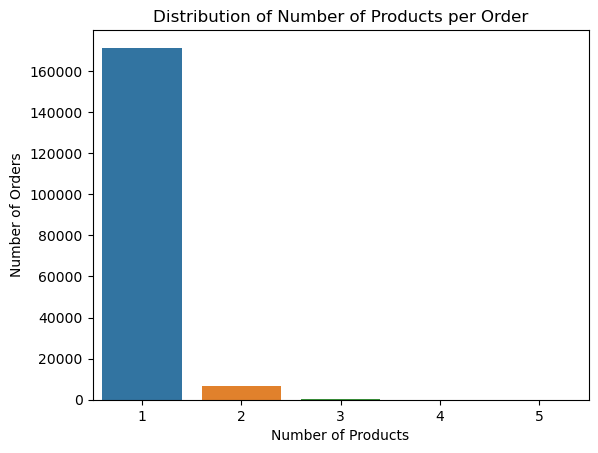

In [27]:
product_counts = all_data.groupby('Order ID')['Product'].count().value_counts()
display(product_counts)
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Products per Order')
plt.show()

**There was 6778 Orders of two products, 340 orders of 3 products, 17 orders of 4 products and 1 order of 1 product**

#### Computing support, Confidence & Lift

In [ ]:
# Function to get support
def Support(product:str):
    return all_data[all_data['Product']==product].count().max()/len(all_data)

def Combined_Support(product1:str,product2:str):
    return all_data[(all_data['Product']==product1) & (all_data['Product']==product2)].count().max()/len(all_data)

In [79]:
product1='Lightning Charging Cable'
product2= 'iPhone'

In [85]:
all_data[(all_data['Product']==product1) & (all_data['Product']==product2)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count


In [80]:
# support Lightning Charging Cable
support_1 = Support(product1)

# support iPhone
support_2 = Support(product2)

print("Lightning Charging Cable: %.3f" % support_1)
print("iPhone: %.3f" % support_2)

Lightning Charging Cable: 0.116
iPhone: 0.037


In [84]:
support_12= Combined_Support(product1,product2)
# Print results
print("support iPhone, Lightning Charging Cable: %.5f" % support_12)

confidence_12 = support_12 / support_2
confidence_21 = support_12 / support_1

# Print results
print('{0:.6f}, {1:.6f}'.format(confidence_12, confidence_21))


support iPhone, Lightning Charging Cable: 0.00000
0.000000, 0.000000


#### Association Rules-A priori algorithm

In [28]:
## Generate a comma separated column of products by id
df_agg = all_data.groupby('Order ID')['Product'].agg(lambda x: ', '.join(x)).reset_index().drop('Order ID',axis=1)

In [29]:
# Some products that are buying together
df_agg[df_agg['Product'].str.len()>30]

,Product
41,"USB-C Charging Cable, Wired Headphones"
56,"Apple Airpods Headphones, AA Batteries (4-pack)"
131,"Vareebadd Phone, Wired Headphones"
150,"Google Phone, USB-C Charging Cable"
216,"Google Phone, Bose SoundSport Headphones"
...,...
178280,"AAA Batteries (4-pack), Wired Headphones"
178299,"27in FHD Monitor, AAA Batteries (4-pack)"
178302,"Macbook Pro Laptop, Wired Headphones"
178362,"iPhone, Lightning Charging Cable"


In [30]:
# Generated a list of transactions and products
transactions = [[value] for value in df_agg['Product'].tolist()]
transactions

[['iPhone'],
 ['Lightning Charging Cable'],
 ['Wired Headphones'],
 ['27in FHD Monitor'],
 ['Wired Headphones'],
 ['AAA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['USB-C Charging Cable'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['Macbook Pro Laptop'],
 ['AAA Batteries (4-pack)'],
 ['27in FHD Monitor'],
 ['Flatscreen TV'],
 ['27in FHD Monitor'],
 ['Vareebadd Phone'],
 ['Apple Airpods Headphones'],
 ['USB-C Charging Cable'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['Google Phone'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['AAA Batteries (4-pack)'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['27in 4K Gaming Monitor'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['Wired Headphones

In [31]:
products=all_data['Product'].unique().tolist()
products

['USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Google Phone',
 'Wired Headphones',
 'Macbook Pro Laptop',
 'Lightning Charging Cable',
 '27in 4K Gaming Monitor',
 'AA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'AAA Batteries (4-pack)',
 'iPhone',
 'Flatscreen TV',
 '27in FHD Monitor',
 '20in Monitor',
 'LG Dryer',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'LG Washing Machine',
 '34in Ultrawide Monitor']

In [60]:
# using mlxtend package
from mlxtend.preprocessing import TransactionEncoder
# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

0.11647216993815541

In [36]:
support = onehot.mean()
print(support.sort_values(ascending=False))

Lightning Charging Cable                                0.111137
AAA Batteries (4-pack)                                  0.111109
AA Batteries (4-pack)                                   0.111014
USB-C Charging Cable                                    0.110919
Wired Headphones                                        0.096437
                                                          ...   
LG Dryer, 27in FHD Monitor                              0.000006
LG Dryer, 27in 4K Gaming Monitor                        0.000006
Google Phone, Wired Headphones, USB-C Charging Cable    0.000006
Google Phone, Wired Headphones, Macbook Pro Laptop      0.000006
iPhone, iPhone                                          0.000006
Length: 385, dtype: float64


#### Confidence and Lift

In [59]:
# computing support for 'iPhone' and 'Lightning Charging Cable'
suport_pair1= onehot['iPhone, USB-C Charging Cable'].mean()
print("support for 'iPhone' and 'Lightning Charging Cable': %.4f" % suport_pair1)


support for 'iPhone' and 'Lightning Charging Cable': 0.0001
